In [ ]:
# Check Pytorch installation
import torch, torchvision
print("torch version:",torch.__version__, "cuda:",torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print("mmdetection:",mmdet.__version__)

# Check mmcv installation
import mmcv
print("mmcv:",mmcv.__version__)

# Check mmengine installation
import mmengine
print("mmengine:",mmengine.__version__)

torch version: 1.13.0 cuda: True
mmdetection: 3.2.0
mmcv: 2.1.0
mmengine: 0.9.1


In [4]:
import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
config_file = './checkpoints/mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py'
# Setup a checkpoint file to load
checkpoint_file = './checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

register_all_modules()

model = init_detector(config_file, checkpoint_file, device='cuda:0')

Loads checkpoint by local backend from path: ./checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


In [5]:
image = mmcv.imread('./mmdetection/demo/demo.jpg', channel_order='rgb')
result = inference_detector(model, image)
print(result)

<DetDataSample(

    META INFORMATION
    img_shape: (800, 1199)
    img_id: 0
    ori_shape: (427, 640)
    batch_input_shape: (800, 1216)
    pad_shape: (800, 1216)
    scale_factor: (1.8734375, 1.873536299765808)
    img_path: None

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([13,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 13, 56,  2,  2,
                         2,  0,  0,  2,  2,  2,  0,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,
                         0,  7,  7,  7,  2,  7,  7, 25,  2,  0,  2,  7,  7,  2,  2,  7],
                       device='cuda:0')
            bboxes: tensor([[219.8677, 177.0776, 458.3699, 382.1378],
                        [480.5591, 110.4768, 523.1897, 130.3326],
                        [167.2959, 108.4706, 219.3714, 139.7076],
                        [432.7687, 104.8359, 482.8199, 132.2971],
                        [293.9354, 116.1539, 381.

In [23]:
from mmdet.registry import VISUALIZERS
visualizer = VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta = model.dataset_meta



c:\Users\asiclab\anaconda3\envs\openmmlab\lib\site-packages\mmengine\visualization\visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


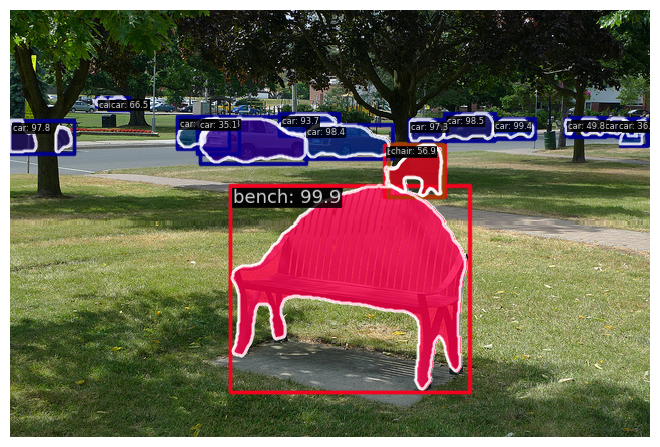

In [24]:
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time = 0,
)

visualizer.show()

In [25]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('data/'):
        print(dirname)
import os
import sys
sys.path.append("mmdetection")
import time
import matplotlib

import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

data/
data/test
data/test\images
data/train
data/train\images
data/validation
data/validation\images


In [1]:
# Check the label of a single image
import mmengine
from collections import OrderedDict
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pylab as plt
from tqdm.notebook import tqdm
import cv2

annotation = mmengine.load('./data/train/annotations.json')

In [2]:
annotation.keys()

dict_keys(['categories', 'info', 'images', 'annotations'])

In [3]:
annotation['info']

'{}'

In [1]:
# For reading annotations file
from pycocotools.coco import COCO
import json
import mmengine
from collections import OrderedDict
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pylab as plt
from tqdm.notebook import tqdm
import cv2

# Reading annotations.json
TRAIN_ANNOTATIONS_PATH = "data2.0//train/annotations.json"
TRAIN_IMAGE_DIRECTIORY = "data2.0/train/images/"

VAL_ANNOTATIONS_PATH = "data2.0/val/annotations.json"
VAL_IMAGE_DIRECTIORY = "data2.0/val/images/"

train_coco = COCO(TRAIN_ANNOTATIONS_PATH)



loading annotations into memory...
Done (t=2.59s)
creating index...
index created!


In [2]:
# Reading the annotation files
with open(TRAIN_ANNOTATIONS_PATH) as f:
  train_annotations_data = json.load(f)

with open(VAL_ANNOTATIONS_PATH) as f:
  val_annotations_data = json.load(f)
  
train_annotations_data['annotations'][0]

{'id': 184135,
 'image_id': 131094,
 'category_id': 1352,
 'segmentation': [[115.0,
   206.5,
   98.0,
   204.5,
   74.5,
   182.0,
   65.0,
   167.5,
   47.5,
   156.0,
   39.5,
   137.0,
   39.5,
   130.0,
   51.0,
   118.5,
   62.00000000000001,
   112.5,
   76.0,
   113.5,
   121.5,
   151.0,
   130.5,
   169.0,
   131.5,
   185.0,
   128.5,
   195.0]],
 'area': 5059.0,
 'bbox': [39.5, 39.5, 167.0, 92.0],
 'iscrowd': 0}

In [ ]:
category_ids = train_coco.loadCats(train_coco.getCatIds())
category_names = [cat["name_readable"] for cat in category_ids]

print("## Categories\n-", "\n- ".join(category_names))

## Categories
- Beetroot, steamed, without addition of salt
- bread_wholemeal
- jam
- water
- bread
- banana
- soft_cheese
- ham_raw
- hard_cheese
- cottage_cheese
- coffee
- fruit_mixed
- pancake
- tea
- salmon_smoked
- avocado
- spring_onion_scallion
- ristretto_with_caffeine
- ham_n_s
- egg
- bacon
- chips_french_fries
- juice_apple
- chicken
- tomato
- broccoli
- shrimp_prawn
- carrot
- chickpeas
- french_salad_dressing
- pasta_hornli_ch
- sauce_cream
- pasta_n_s
- tomato_sauce
- cheese_n_s
- pear
- cashew_nut
- almonds
- lentil_n_s
- mixed_vegetables
- peanut_butter
- apple
- blueberries
- cucumber
- yogurt
- butter
- mayonnaise
- soup
- wine_red
- wine_white
- green_bean_steamed_without_addition_of_salt
- sausage
- pizza_margherita_baked
- salami_ch
- mushroom
- tart_n_s
- rice
- white_coffee
- sunflower_seeds
- bell_pepper_red_raw
- zucchini
- asparagus
- tartar_sauce
- lye_pretzel_soft
- cucumber_pickled_ch
- curry_vegetarian
- soup_of_lentils_dahl_dhal
- salmon
- salt_cake_ch_

In [5]:
#fix dataset
import numpy as np
import pandas as pd
import cv2
import json
from tqdm.notebook import tqdm

# Reading annotations.json

TRAIN_ANNOTATIONS_PATH = "./data2.0/train/annotations.json"
TRAIN_IMAGE_DIRECTIORY = "./data2.0/train/images/"

VAL_ANNOTATIONS_PATH = "./data2.0/val/annotations.json"
VAL_IMAGE_DIRECTIORY = "./data2.0/val/images/"

# train_coco = COCO(TRAIN_ANNOTATIONS_PATH)

# Reading the annotation files
with open(TRAIN_ANNOTATIONS_PATH) as f:
  train_annotations_data = json.load(f)

with open(VAL_ANNOTATIONS_PATH) as f:
  val_annotations_data = json.load(f)



# Function for taking a annotation & directiory of images and returning new annoation json with fixed image size info
def fix_data(annotations, directiory, VERBOSE = False):
  for n, i in enumerate(tqdm((annotations['images']))):
   
      img = cv2.imread(directiory+i["file_name"])
 
      if img.shape[0] != i['height']:
          annotations['images'][n]['height'] = img.shape[0]
          if VERBOSE:
            print(i["file_name"])
            print(annotations['images'][n], img.shape)

      if img.shape[1] != i['width']:
          annotations['images'][n]['width'] = img.shape[1]
          if VERBOSE:
            print(i["file_name"])
            print(annotations['images'][n], img.shape)

  return annotations

train_annotations_data = fix_data(train_annotations_data, TRAIN_IMAGE_DIRECTIORY)

with open('./data2.0/train/new_ann.json', 'w') as f:
    json.dump(train_annotations_data, f)

val_annotations_data = fix_data(val_annotations_data, VAL_IMAGE_DIRECTIORY)

with open('./data2.0/val/new_ann.json', 'w') as f:
    json.dump(val_annotations_data, f)

  0%|          | 0/39962 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [6]:
# You can add more model configs like below.
MODELS_CONFIG = {
    'htc_without_semantic_r50_fpn_1x': {
        'config_file': 'configs/htc/htc-without-semantic_r50_fpn_1x_coco.py'
    }
}

# Pick the model you want to use
selected_model = 'htc_without_semantic_r50_fpn_1x' # chose any config you want from the MODELS_CONFIG

# Name of the config file.
config_file = MODELS_CONFIG[selected_model]['config_file']

config_fname = os.path.join('mmdetection', config_file)
assert os.path.isfile(config_fname), '`{}` not exist'.format(config_fname)
config_fname

'mmdetection\\configs/htc/htc-without-semantic_r50_fpn_1x_coco.py'

In [7]:
# Explore classes to predict, we will use this while editing the config
annotation_path = os.path.join("data2.0", "train/new_ann.json")
json_file = open(annotation_path)
coco = json.load(json_file)
print(coco["categories"])
classes_names = [category["name"] for category in coco["categories"]]
print(classes_names)

[{'id': 1565, 'name': 'bread-wholemeal', 'name_readable': 'Bread, wholemeal', 'supercategory': 'food'}, {'id': 2099, 'name': 'jam', 'name_readable': 'Jam', 'supercategory': 'food'}, {'id': 2578, 'name': 'water', 'name_readable': 'Water', 'supercategory': 'food'}, {'id': 1556, 'name': 'bread-sourdough', 'name_readable': 'Bread, sourdough', 'supercategory': 'food'}, {'id': 1154, 'name': 'banana', 'name_readable': 'Banana', 'supercategory': 'food'}, {'id': 1352, 'name': 'soft-cheese', 'name_readable': 'Soft cheese', 'supercategory': 'food'}, {'id': 1893, 'name': 'ham-raw', 'name_readable': 'Ham, raw', 'supercategory': 'food'}, {'id': 1310, 'name': 'hard-cheese', 'name_readable': 'Hard cheese', 'supercategory': 'food'}, {'id': 1264, 'name': 'cottage-cheese', 'name_readable': 'Cottage cheese', 'supercategory': 'food'}, {'id': 1536, 'name': 'bread-half-white', 'name_readable': 'Bread, half white', 'supercategory': 'food'}, {'id': 2512, 'name': 'coffee-with-caffeine', 'name_readable': 'Coffee

In [8]:
import re
fname = config_fname
with open(fname) as f:
    s = f.read()

    s = re.sub('num_classes=.*?,',
               'num_classes={},'.format(len(classes_names)), s)

with open(fname, 'w') as f:
    f.write(s)
#lets check if the changes have been updated

In [9]:
import re
fname2 = './mmdetection/configs/_base_/datasets/coco_instance.py'

with open(fname2) as f:
    s = f.read()
    s = re.sub("data_root = 'data2.0/coco/'",
                "data_root = 'data2.0/'", s)
    s = re.sub("annotations/instances_train2017.json",
                "train/new_ann.json", s)
    s = re.sub("annotations/instances_val2017.json",
                "val/new_ann.json", s)
    s = re.sub("annotations/instances_val2017.json",
                "val/new_ann.json", s)
    s = re.sub("train2017", "train/images", s)
    s = re.sub("val2017", "val/images", s)
    s = re.sub("workers_per_gpu=2","workers_per_gpu=0",s)
    s = re.sub("samples_per_gpu=2","samples_per_gpu=6",s) 
   

with open(fname2, 'w') as f:
    f.write(s)

#to check if the changes have been updated
# !cat {fname2}


total_epochs = 22
fname = './mmdetection/configs/_base_/schedules/schedule_1x.py'
with open(fname) as f:
    s = f.read()
    s = re.sub('max_epochs=\d+',
               'max_epochs={}'.format(total_epochs), s)
    s = re.sub("lr=0.02","lr=0.0025",s)  #need to change lr to 0.0025 since we are working with only 1 gpu
with open(fname, 'w') as f:
    f.write(s)

In [13]:
%%writefile ./mmdetection/mmdet/datasets/coco.py

import contextlib
import io
import itertools
import logging
import os.path as osp
import tempfile
import warnings
from collections import OrderedDict

import mmcv
import numpy as np
from mmcv.utils import print_log
from terminaltables import AsciiTable

from mmdet.core import eval_recalls
from .api_wrappers import COCO, COCOeval
from .builder import DATASETS
from .custom import CustomDataset


@DATASETS.register_module()
class CocoDataset(CustomDataset):

    CLASSES = ('bread-wholemeal', 'jam', 'water', 'bread-sourdough', 'banana', 'soft-cheese', 'ham-raw', 'hard-cheese', 'cottage-cheese', 'bread-half-white', 'coffee-with-caffeine', 'fruit-salad', 'pancakes', 'tea', 'salmon-smoked', 'avocado', 'spring-onion-scallion', 'ristretto-with-caffeine', 'ham', 'egg', 'bacon-frying', 'chips-french-fries', 'juice-apple', 'chicken', 'tomato-raw', 'broccoli', 'shrimp-boiled', 'beetroot-steamed-without-addition-of-salt', 'carrot-raw', 'chickpeas', 'french-salad-dressing', 'pasta-hornli', 'sauce-cream', 'meat-balls', 'pasta', 'tomato-sauce', 'cheese', 'pear', 'cashew-nut', 'almonds', 'lentils', 'mixed-vegetables', 'peanut-butter', 'apple', 'blueberries', 'cucumber', 'cocoa-powder', 'greek-yaourt-yahourt-yogourt-ou-yoghourt', 'maple-syrup-concentrate', 'buckwheat-grain-peeled', 'butter', 'herbal-tea', 'mayonnaise', 'soup-vegetable', 'wine-red', 'wine-white', 'green-bean-steamed-without-addition-of-salt', 'sausage', 'pizza-margherita-baked', 'salami', 'mushroom', 'bread-meat-substitute-lettuce-sauce', 'tart', 'tea-verveine', 'rice', 'white-coffee-with-caffeine', 'linseeds', 'sunflower-seeds', 'ham-cooked', 'bell-pepper-red-raw', 'zucchini', 'green-asparagus', 'tartar-sauce', 'lye-pretzel-soft', 'cucumber-pickled', 'curry-vegetarian', 'yaourt-yahourt-yogourt-ou-yoghourt-natural', 'soup-of-lentils-dahl-dhal', 'soup-cream-of-vegetables', 'balsamic-vinegar', 'salmon', 'salt-cake-vegetables-filled', 'bacon', 'orange', 'pasta-noodles', 'cream', 'cake-chocolate', 'pasta-spaghetti', 'black-olives', 'parmesan', 'spaetzle', 'salad-lambs-ear', 'salad-leaf-salad-green', 'potatoes-steamed', 'white-cabbage', 'halloumi', 'beetroot-raw', 'bread-grain', 'applesauce-unsweetened-canned', 'cheese-for-raclette', 'mushrooms', 'bread-white', 'curds-natural-with-at-most-10-fidm', 'bagel-without-filling', 'quiche-with-cheese-baked-with-puff-pastry', 'soup-potato', 'bouillon-vegetable', 'beef-sirloin-steak', 'taboule-prepared-with-couscous', 'eggplant', 'bread', 'turnover-with-meat-small-meat-pie-empanadas', 'mungbean-sprouts', 'mozzarella', 'pasta-penne', 'lasagne-vegetable-prepared', 'mandarine', 'kiwi', 'french-beans', 'tartar-meat', 'spring-roll-fried', 'pork-chop', 'caprese-salad-tomato-mozzarella', 'leaf-spinach', 'roll-of-half-white-or-white-flour-with-large-void', 'pasta-ravioli-stuffing', 'omelette-plain', 'tuna', 'dark-chocolate', 'sauce-savoury', 'dried-raisins', 'ice-tea', 'kaki', 'macaroon', 'smoothie', 'crepe-plain', 'chicken-nuggets', 'chili-con-carne-prepared', 'veggie-burger', 'cream-spinach', 'cod', 'chinese-cabbage', 'hamburger-bread-meat-ketchup', 'soup-pumpkin', 'sushi', 'chestnuts', 'coffee-decaffeinated', 'sauce-soya', 'balsamic-salad-dressing', 'pasta-twist', 'bolognaise-sauce', 'leek', 'fajita-bread-only', 'potato-gnocchi', 'beef-cut-into-stripes-only-meat', 'rice-noodles-vermicelli', 'tea-ginger', 'tea-green', 'bread-whole-wheat', 'onion', 'garlic', 'hummus', 'pizza-with-vegetables-baked', 'beer', 'glucose-drink-50g', 'chicken-wing', 'ratatouille', 'peanut', 'high-protein-pasta-made-of-lentils-peas', 'cauliflower', 'quiche-with-spinach-baked-with-cake-dough', 'green-olives', 'brazil-nut', 'eggplant-caviar', 'bread-pita', 'pasta-wholemeal', 'sauce-pesto', 'oil', 'couscous', 'sauce-roast', 'prosecco', 'crackers', 'bread-toast', 'shrimp-prawn-small', 'panna-cotta', 'romanesco', 'water-with-lemon-juice', 'espresso-with-caffeine', 'egg-scrambled-prepared', 'juice-orange', 'ice-cubes', 'braided-white-loaf', 'emmental-cheese', 'croissant-wholegrain', 'hazelnut-chocolate-spread-nutella-ovomaltine-caotina', 'tomme', 'water-mineral', 'hazelnut', 'bacon-raw', 'bread-nut', 'black-forest-tart', 'soup-miso', 'peach', 'figs', 'beef-filet', 'mustard-dijon', 'rice-basmati', 'mashed-potatoes-prepared-with-full-fat-milk-with-butter', 'dumplings', 'pumpkin', 'swiss-chard', 'red-cabbage', 'spinach-raw', 'naan-indien-bread', 'chicken-curry-cream-coconut-milk-curry-spices-paste', 'crunch-muesli', 'biscuits', 'bread-french-white-flour', 'meatloaf', 'fresh-cheese', 'honey', 'vegetable-mix-peas-and-carrots', 'parsley', 'brownie', 'dairy-ice-cream', 'tea-black', 'carrot-cake', 'fish-fingers-breaded', 'salad-dressing', 'dried-meat', 'chicken-breast', 'mixed-salad-chopped-without-sauce', 'feta', 'praline', 'tea-peppermint', 'walnut', 'potato-salad-with-mayonnaise-yogurt-dressing', 'kebab-in-pita-bread', 'kolhrabi', 'alfa-sprouts', 'brussel-sprouts', 'bacon-cooking', 'gruyere', 'bulgur', 'grapes', 'pork-escalope', 'chocolate-egg-small', 'cappuccino', 'zucchini-stewed-without-addition-of-fat-without-addition-of-salt', 'crisp-bread-wasa', 'bread-black', 'perch-fillets-lake', 'rosti', 'mango', 'sandwich-ham-cheese-and-butter', 'muesli', 'spinach-steamed-without-addition-of-salt', 'fish', 'risotto-without-cheese-cooked', 'milk-chocolate-with-hazelnuts', 'cake-oblong', 'crisps', 'pork', 'pomegranate', 'sweet-corn-canned', 'flakes-oat', 'greek-salad', 'cantonese-fried-rice', 'sesame-seeds', 'bouillon', 'baked-potato', 'fennel', 'meat', 'bread-olive', 'croutons', 'philadelphia', 'mushroom-average-stewed-without-addition-of-fat-without-addition-of-salt', 'bell-pepper-red-stewed-without-addition-of-fat-without-addition-of-salt', 'white-chocolate', 'mixed-nuts', 'breadcrumbs-unspiced', 'fondue', 'sauce-mushroom', 'tea-spice', 'strawberries', 'tea-rooibos', 'pie-plum-baked-with-cake-dough', 'potatoes-au-gratin-dauphinois-prepared', 'capers', 'vegetables', 'bread-wholemeal-toast', 'red-radish', 'fruit-tart', 'beans-kidney', 'sauerkraut', 'mustard', 'country-fries', 'ketchup', 'pasta-linguini-parpadelle-tagliatelle', 'chicken-cut-into-stripes-only-meat', 'cookies', 'sun-dried-tomatoe', 'bread-ticino', 'semi-hard-cheese', 'margarine', 'porridge-prepared-with-partially-skimmed-milk', 'soya-drink-soy-milk', 'juice-multifruit', 'popcorn-salted', 'chocolate-filled', 'milk-chocolate', 'bread-fruit', 'mix-of-dried-fruits-and-nuts', 'corn', 'tete-de-moine', 'dates', 'pistachio', 'celery', 'white-radish', 'oat-milk', 'cream-cheese', 'bread-rye', 'witloof-chicory', 'apple-crumble', 'goat-cheese-soft', 'grapefruit-pomelo', 'risotto-with-mushrooms-cooked', 'blue-mould-cheese', 'biscuit-with-butter', 'guacamole', 'pecan-nut', 'tofu', 'cordon-bleu-from-pork-schnitzel-fried', 'paprika-chips', 'quinoa', 'kefir-drink', 'm-m-s', 'salad-rocket', 'bread-spelt', 'pizza-with-ham-with-mushrooms-baked', 'fruit-coulis', 'plums', 'beef-minced-only-meat', 'pizza-with-ham-baked', 'pineapple', 'soup-tomato', 'cheddar', 'tea-fruit', 'rice-jasmin', 'seeds', 'focaccia', 'milk', 'coleslaw-chopped-without-sauce', 'pastry-flaky', 'curd', 'savoury-puff-pastry-stick', 'sweet-potato', 'chicken-leg', 'croissant', 'sour-cream', 'ham-turkey', 'processed-cheese', 'fruit-compotes', 'cheesecake', 'pasta-tortelloni-stuffing', 'sauce-cocktail', 'croissant-with-chocolate-filling', 'pumpkin-seeds', 'artichoke', 'champagne', 'grissini', 'sweets-candies', 'brie', 'wienerli-swiss-sausage', 'syrup-diluted-ready-to-drink', 'apple-pie', 'white-bread-with-butter-eggs-and-milk', 'savoury-puff-pastry', 'anchovies', 'tuna-in-oil-drained', 'lemon-pie', 'meat-terrine-pate', 'coriander', 'falafel-balls', 'berries', 'latte-macchiato-with-caffeine', 'faux-mage-cashew-vegan-chers', 'beans-white', 'sugar-melon', 'mixed-seeds', 'hamburger', 'hamburger-bun', 'oil-vinegar-salad-dressing', 'soya-yaourt-yahourt-yogourt-ou-yoghourt', 'chocolate-milk-chocolate-drink', 'celeriac', 'chocolate-mousse', 'cenovis-yeast-spread', 'thickened-cream-35', 'meringue', 'lamb-chop', 'shrimp-prawn-large', 'beef', 'lemon', 'croque-monsieur', 'chives', 'chocolate-cookies', 'birchermuesli-prepared-no-sugar-added', 'fish-crunchies-battered', 'muffin', 'savoy-cabbage-steamed-without-addition-of-salt', 'pine-nuts', 'chorizo', 'chia-grains', 'frying-sausage', 'french-pizza-from-alsace-baked', 'chocolate', 'cooked-sausage', 'grits-polenta-maize-flour', 'gummi-bears-fruit-jellies-jelly-babies-with-fruit-essence', 'wine-rose', 'coca-cola', 'raspberries', 'roll-with-pieces-of-chocolate', 'goat-average-raw', 'lemon-cake', 'coconut-milk', 'rice-wild', 'gluten-free-bread', 'pearl-onions', 'buckwheat-pancake', 'bread-5-grain', 'light-beer', 'sugar-glazing', 'tzatziki', 'butter-herb', 'ham-croissant', 'corn-crisps', 'lentils-green-du-puy-du-berry', 'cocktail', 'rice-whole-grain', 'veal-sausage', 'cervelat', 'sorbet', 'aperitif-with-alcohol-aperol-spritz', 'dips', 'corn-flakes', 'peas', 'tiramisu', 'apricots', 'cake-marble', 'lamb', 'lasagne-meat-prepared', 'coca-cola-zero', 'cake-salted', 'dough-puff-pastry-shortcrust-bread-pizza-dough', 'rice-waffels', 'sekt', 'brioche', 'vegetable-au-gratin-baked', 'mango-dried', 'processed-meat-charcuterie', 'mousse', 'sauce-sweet-sour', 'basil', 'butter-spread-puree-almond', 'pie-apricot-baked-with-cake-dough', 'rusk-wholemeal', 'beef-roast', 'vanille-cream-cooked-custard-creme-dessert', 'pasta-in-conch-form', 'nuts', 'sauce-carbonara', 'fig-dried', 'pasta-in-butterfly-form-farfalle', 'minced-meat', 'carrot-steamed-without-addition-of-salt', 'ebly', 'damson-plum', 'shoots', 'bouquet-garni', 'coconut', 'banana-cake', 'waffle', 'apricot-dried', 'sauce-curry', 'watermelon-fresh', 'sauce-sweet-salted-asian', 'pork-roast', 'blackberry', 'smoked-cooked-sausage-of-pork-and-beef-meat-sausag', 'bean-seeds', 'italian-salad-dressing', 'white-asparagus', 'pie-rhubarb-baked-with-cake-dough', 'tomato-stewed-without-addition-of-fat-without-addition-of-salt', 'cherries', 'nectarine')

    def load_annotations(self, ann_file):
        """Load annotation from COCO style annotation file.

        Args:
            ann_file (str): Path of annotation file.

        Returns:
            list[dict]: Annotation info from COCO api.
        """

        self.coco = COCO(ann_file)
        # The order of returned `cat_ids` will not
        # change with the order of the CLASSES
        self.cat_ids = self.coco.getCatIds()

        self.cat2label = {cat_id: i for i, cat_id in enumerate(self.cat_ids)}
        self.img_ids = self.coco.getImgIds()
        data_infos = []
        total_ann_ids = []
        for i in self.img_ids:
            info = self.coco.load_imgs([i])[0]
            info['filename'] = info['file_name']
            data_infos.append(info)
            ann_ids = self.coco.get_ann_ids(img_ids=[i])
            total_ann_ids.extend(ann_ids)
        assert len(set(total_ann_ids)) == len(
            total_ann_ids), f"Annotation ids in '{ann_file}' are not unique!"
        return data_infos

    def get_ann_info(self, idx):
        """Get COCO annotation by index.

        Args:
            idx (int): Index of data.

        Returns:
            dict: Annotation info of specified index.
        """

        img_id = self.data_infos[idx]['id']
        ann_ids = self.coco.get_ann_ids(img_ids=[img_id])
        ann_info = self.coco.load_anns(ann_ids)
        return self._parse_ann_info(self.data_infos[idx], ann_info)

    def getCatIds(self, idx):
        """Get COCO category ids by index.

        Args:
            idx (int): Index of data.

        Returns:
            list[int]: All categories in the image of specified index.
        """

        img_id = self.data_infos[idx]['id']
        ann_ids = self.coco.get_ann_ids(img_ids=[img_id])
        ann_info = self.coco.load_anns(ann_ids)
        return [ann['category_id'] for ann in ann_info]

    def _filter_imgs(self, min_size=32):
        """Filter images too small or without ground truths."""
        valid_inds = []
        # obtain images that contain annotation
        ids_with_ann = set(_['image_id'] for _ in self.coco.anns.values())
        # obtain images that contain annotations of the required categories
        ids_in_cat = set()
        for i, class_id in enumerate(self.cat_ids):
            ids_in_cat |= set(self.coco.cat_img_map[class_id])
        # merge the image id sets of the two conditions and use the merged set
        # to filter out images if self.filter_empty_gt=True
        ids_in_cat &= ids_with_ann

        valid_img_ids = []
        for i, img_info in enumerate(self.data_infos):
            img_id = self.img_ids[i]
            if self.filter_empty_gt and img_id not in ids_in_cat:
                continue
            if min(img_info['width'], img_info['height']) >= min_size:
                valid_inds.append(i)
                valid_img_ids.append(img_id)
        self.img_ids = valid_img_ids
        return valid_inds

    def _parse_ann_info(self, img_info, ann_info):
        """Parse bbox and mask annotation.

        Args:
            ann_info (list[dict]): Annotation info of an image.
            with_mask (bool): Whether to parse mask annotations.

        Returns:
            dict: A dict containing the following keys: bboxes, bboxes_ignore,\
                labels, masks, seg_map. "masks" are raw annotations and not \
                decoded into binary masks.
        """
        gt_bboxes = []
        gt_labels = []
        gt_bboxes_ignore = []
        gt_masks_ann = []
        for i, ann in enumerate(ann_info):
            if ann.get('ignore', False):
                continue
            x1, y1, w, h = ann['bbox']
            inter_w = max(0, min(x1 + w, img_info['width']) - max(x1, 0))
            inter_h = max(0, min(y1 + h, img_info['height']) - max(y1, 0))
            if inter_w * inter_h == 0:
                continue
            if ann['area'] <= 0 or w < 1 or h < 1:
                continue
            if ann['category_id'] not in self.cat_ids:
                continue
            bbox = [x1, y1, x1 + w, y1 + h]
            if ann.get('iscrowd', False):
                gt_bboxes_ignore.append(bbox)
            else:
                gt_bboxes.append(bbox)
                gt_labels.append(self.cat2label[ann['category_id']])
                gt_masks_ann.append(ann.get('segmentation', None))

        if gt_bboxes:
            gt_bboxes = np.array(gt_bboxes, dtype=np.float32)
            gt_labels = np.array(gt_labels, dtype=np.int64)
        else:
            gt_bboxes = np.zeros((0, 4), dtype=np.float32)
            gt_labels = np.array([], dtype=np.int64)

        if gt_bboxes_ignore:
            gt_bboxes_ignore = np.array(gt_bboxes_ignore, dtype=np.float32)
        else:
            gt_bboxes_ignore = np.zeros((0, 4), dtype=np.float32)

        seg_map = img_info['filename'].replace('jpg', 'png')

        ann = dict(
            bboxes=gt_bboxes,
            labels=gt_labels,
            bboxes_ignore=gt_bboxes_ignore,
            masks=gt_masks_ann,
            seg_map=seg_map)

        return ann

    def xyxy2xywh(self, bbox):
        """Convert ``xyxy`` style bounding boxes to ``xywh`` style for COCO
        evaluation.

        Args:
            bbox (numpy.ndarray): The bounding boxes, shape (4, ), in
                ``xyxy`` order.

        Returns:
            list[float]: The converted bounding boxes, in ``xywh`` order.
        """

        _bbox = bbox.tolist()
        return [
            _bbox[0],
            _bbox[1],
            _bbox[2] - _bbox[0],
            _bbox[3] - _bbox[1],
        ]

    def _proposal2json(self, results):
        """Convert proposal results to COCO json style."""
        json_results = []
        for idx in range(len(self)):
            img_id = self.img_ids[idx]
            bboxes = results[idx]
            for i in range(bboxes.shape[0]):
                data = dict()
                data['image_id'] = img_id
                data['bbox'] = self.xyxy2xywh(bboxes[i])
                data['score'] = float(bboxes[i][4])
                data['category_id'] = 1
                json_results.append(data)
        return json_results

    def _det2json(self, results):
        """Convert detection results to COCO json style."""
        json_results = []
        for idx in range(len(self)):
            img_id = self.img_ids[idx]
            result = results[idx]
            for label in range(len(result)):
                bboxes = result[label]
                for i in range(bboxes.shape[0]):
                    data = dict()
                    data['image_id'] = img_id
                    data['bbox'] = self.xyxy2xywh(bboxes[i])
                    data['score'] = float(bboxes[i][4])
                    data['category_id'] = self.cat_ids[label]
                    json_results.append(data)
        return json_results

    def _segm2json(self, results):
        """Convert instance segmentation results to COCO json style."""
        bbox_json_results = []
        segm_json_results = []
        for idx in range(len(self)):
            img_id = self.img_ids[idx]
            det, seg = results[idx]
            for label in range(len(det)):
                # bbox results
                bboxes = det[label]
                for i in range(bboxes.shape[0]):
                    data = dict()
                    data['image_id'] = img_id
                    data['bbox'] = self.xyxy2xywh(bboxes[i])
                    data['score'] = float(bboxes[i][4])
                    data['category_id'] = self.cat_ids[label]
                    bbox_json_results.append(data)

                # segm results
                # some detectors use different scores for bbox and mask
                if isinstance(seg, tuple):
                    segms = seg[0][label]
                    mask_score = seg[1][label]
                else:
                    segms = seg[label]
                    mask_score = [bbox[4] for bbox in bboxes]
                for i in range(bboxes.shape[0]):
                    data = dict()
                    data['image_id'] = img_id
                    data['bbox'] = self.xyxy2xywh(bboxes[i])
                    data['score'] = float(mask_score[i])
                    data['category_id'] = self.cat_ids[label]
                    if isinstance(segms[i]['counts'], bytes):
                        segms[i]['counts'] = segms[i]['counts'].decode()
                    data['segmentation'] = segms[i]
                    segm_json_results.append(data)
        return bbox_json_results, segm_json_results

    def results2json(self, results, outfile_prefix):
        """Dump the detection results to a COCO style json file.

        There are 3 types of results: proposals, bbox predictions, mask
        predictions, and they have different data types. This method will
        automatically recognize the type, and dump them to json files.

        Args:
            results (list[list | tuple | ndarray]): Testing results of the
                dataset.
            outfile_prefix (str): The filename prefix of the json files. If the
                prefix is "somepath/xxx", the json files will be named
                "somepath/xxx.bbox.json", "somepath/xxx.segm.json",
                "somepath/xxx.proposal.json".

        Returns:
            dict[str: str]: Possible keys are "bbox", "segm", "proposal", and \
                values are corresponding filenames.
        """
        result_files = dict()
        if isinstance(results[0], list):
            json_results = self._det2json(results)
            result_files['bbox'] = f'{outfile_prefix}.bbox.json'
            result_files['proposal'] = f'{outfile_prefix}.bbox.json'
            mmcv.dump(json_results, result_files['bbox'])
        elif isinstance(results[0], tuple):
            json_results = self._segm2json(results)
            result_files['bbox'] = f'{outfile_prefix}.bbox.json'
            result_files['proposal'] = f'{outfile_prefix}.bbox.json'
            result_files['segm'] = f'{outfile_prefix}.segm.json'
            mmcv.dump(json_results[0], result_files['bbox'])
            mmcv.dump(json_results[1], result_files['segm'])
        elif isinstance(results[0], np.ndarray):
            json_results = self._proposal2json(results)
            result_files['proposal'] = f'{outfile_prefix}.proposal.json'
            mmcv.dump(json_results, result_files['proposal'])
        else:
            raise TypeError('invalid type of results')
        return result_files

    def fast_eval_recall(self, results, proposal_nums, iou_thrs, logger=None):
        gt_bboxes = []
        for i in range(len(self.img_ids)):
            ann_ids = self.coco.get_ann_ids(img_ids=self.img_ids[i])
            ann_info = self.coco.load_anns(ann_ids)
            if len(ann_info) == 0:
                gt_bboxes.append(np.zeros((0, 4)))
                continue
            bboxes = []
            for ann in ann_info:
                if ann.get('ignore', False) or ann['iscrowd']:
                    continue
                x1, y1, w, h = ann['bbox']
                bboxes.append([x1, y1, x1 + w, y1 + h])
            bboxes = np.array(bboxes, dtype=np.float32)
            if bboxes.shape[0] == 0:
                bboxes = np.zeros((0, 4))
            gt_bboxes.append(bboxes)

        recalls = eval_recalls(
            gt_bboxes, results, proposal_nums, iou_thrs, logger=logger)
        ar = recalls.mean(axis=1)
        return ar

    def format_results(self, results, jsonfile_prefix=None, **kwargs):
        """Format the results to json (standard format for COCO evaluation).

        Args:
            results (list[tuple | numpy.ndarray]): Testing results of the
                dataset.
            jsonfile_prefix (str | None): The prefix of json files. It includes
                the file path and the prefix of filename, e.g., "a/b/prefix".
                If not specified, a temp file will be created. Default: None.

        Returns:
            tuple: (result_files, tmp_dir), result_files is a dict containing \
                the json filepaths, tmp_dir is the temporal directory created \
                for saving json files when jsonfile_prefix is not specified.
        """
        assert isinstance(results, list), 'results must be a list'
        assert len(results) == len(self), (
            'The length of results is not equal to the dataset len: {} != {}'.
            format(len(results), len(self)))

        if jsonfile_prefix is None:
            tmp_dir = tempfile.TemporaryDirectory()
            jsonfile_prefix = osp.join(tmp_dir.name, 'results')
        else:
            tmp_dir = None
        result_files = self.results2json(results, jsonfile_prefix)
        return result_files, tmp_dir

    def evaluate(self,
                 results,
                 metric='bbox',
                 logger=None,
                 jsonfile_prefix=None,
                 classwise=False,
                 proposal_nums=(100, 300, 1000),
                 iou_thrs=None,
                 metric_items=None):
        """Evaluation in COCO protocol.

        Args:
            results (list[list | tuple]): Testing results of the dataset.
            metric (str | list[str]): Metrics to be evaluated. Options are
                'bbox', 'segm', 'proposal', 'proposal_fast'.
            logger (logging.Logger | str | None): Logger used for printing
                related information during evaluation. Default: None.
            jsonfile_prefix (str | None): The prefix of json files. It includes
                the file path and the prefix of filename, e.g., "a/b/prefix".
                If not specified, a temp file will be created. Default: None.
            classwise (bool): Whether to evaluating the AP for each class.
            proposal_nums (Sequence[int]): Proposal number used for evaluating
                recalls, such as recall@100, recall@1000.
                Default: (100, 300, 1000).
            iou_thrs (Sequence[float], optional): IoU threshold used for
                evaluating recalls/mAPs. If set to a list, the average of all
                IoUs will also be computed. If not specified, [0.50, 0.55,
                0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95] will be used.
                Default: None.
            metric_items (list[str] | str, optional): Metric items that will
                be returned. If not specified, ``['AR@100', 'AR@300',
                'AR@1000', 'AR_s@1000', 'AR_m@1000', 'AR_l@1000' ]`` will be
                used when ``metric=='proposal'``, ``['mAP', 'mAP_50', 'mAP_75',
                'mAP_s', 'mAP_m', 'mAP_l']`` will be used when
                ``metric=='bbox' or metric=='segm'``.

        Returns:
            dict[str, float]: COCO style evaluation metric.
        """

        metrics = metric if isinstance(metric, list) else [metric]
        allowed_metrics = ['bbox', 'segm', 'proposal', 'proposal_fast']
        for metric in metrics:
            if metric not in allowed_metrics:
                raise KeyError(f'metric {metric} is not supported')
        if iou_thrs is None:
            iou_thrs = np.linspace(
                .5, 0.95, int(np.round((0.95 - .5) / .05)) + 1, endpoint=True)
        if metric_items is not None:
            if not isinstance(metric_items, list):
                metric_items = [metric_items]

        result_files, tmp_dir = self.format_results(results, jsonfile_prefix)

        eval_results = OrderedDict()
        cocoGt = self.coco
        for metric in metrics:
            msg = f'Evaluating {metric}...'
            if logger is None:
                msg = '\n' + msg
            print_log(msg, logger=logger)

            if metric == 'proposal_fast':
                ar = self.fast_eval_recall(
                    results, proposal_nums, iou_thrs, logger='silent')
                log_msg = []
                for i, num in enumerate(proposal_nums):
                    eval_results[f'AR@{num}'] = ar[i]
                    log_msg.append(f'\nAR@{num}\t{ar[i]:.4f}')
                log_msg = ''.join(log_msg)
                print_log(log_msg, logger=logger)
                continue

            iou_type = 'bbox' if metric == 'proposal' else metric
            if metric not in result_files:
                raise KeyError(f'{metric} is not in results')
            try:
                predictions = mmcv.load(result_files[metric])
                if iou_type == 'segm':
                    # Refer to https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/coco.py#L331  # noqa
                    # When evaluating mask AP, if the results contain bbox,
                    # cocoapi will use the box area instead of the mask area
                    # for calculating the instance area. Though the overall AP
                    # is not affected, this leads to different
                    # small/medium/large mask AP results.
                    for x in predictions:
                        x.pop('bbox')
                    warnings.simplefilter('once')
                    warnings.warn(
                        'The key "bbox" is deleted for more accurate mask AP '
                        'of small/medium/large instances since v2.12.0. This '
                        'does not change the overall mAP calculation.',
                        UserWarning)
                cocoDt = cocoGt.loadRes(predictions)
            except IndexError:
                print_log(
                    'The testing results of the whole dataset is empty.',
                    logger=logger,
                    level=logging.ERROR)
                break

            cocoEval = COCOeval(cocoGt, cocoDt, iou_type)
            cocoEval.params.catIds = self.cat_ids
            cocoEval.params.imgIds = self.img_ids
            cocoEval.params.maxDets = list(proposal_nums)
            cocoEval.params.iouThrs = iou_thrs
            # mapping of cocoEval.stats
            coco_metric_names = {
                'mAP': 0,
                'mAP_50': 1,
                'mAP_75': 2,
                'mAP_s': 3,
                'mAP_m': 4,
                'mAP_l': 5,
                'AR@100': 6,
                'AR@300': 7,
                'AR@1000': 8,
                'AR_s@1000': 9,
                'AR_m@1000': 10,
                'AR_l@1000': 11
            }
            if metric_items is not None:
                for metric_item in metric_items:
                    if metric_item not in coco_metric_names:
                        raise KeyError(
                            f'metric item {metric_item} is not supported')

            if metric == 'proposal':
                cocoEval.params.useCats = 0
                cocoEval.evaluate()
                cocoEval.accumulate()

                # Save coco summarize print information to logger
                redirect_string = io.StringIO()
                with contextlib.redirect_stdout(redirect_string):
                    cocoEval.summarize()
                print_log('\n' + redirect_string.getvalue(), logger=logger)

                if metric_items is None:
                    metric_items = [
                        'AR@100', 'AR@300', 'AR@1000', 'AR_s@1000',
                        'AR_m@1000', 'AR_l@1000'
                    ]

                for item in metric_items:
                    val = float(
                        f'{cocoEval.stats[coco_metric_names[item]]:.3f}')
                    eval_results[item] = val
            else:
                cocoEval.evaluate()
                cocoEval.accumulate()

                # Save coco summarize print information to logger
                redirect_string = io.StringIO()
                with contextlib.redirect_stdout(redirect_string):
                    cocoEval.summarize()
                print_log('\n' + redirect_string.getvalue(), logger=logger)

                if classwise:  # Compute per-category AP
                    # Compute per-category AP
                    # from https://github.com/facebookresearch/detectron2/
                    precisions = cocoEval.eval['precision']
                    # precision: (iou, recall, cls, area range, max dets)
                    assert len(self.cat_ids) == precisions.shape[2]

                    results_per_category = []
                    for idx, catId in enumerate(self.cat_ids):
                        # area range index 0: all area ranges
                        # max dets index -1: typically 100 per image
                        nm = self.coco.loadCats(catId)[0]
                        precision = precisions[:, :, idx, 0, -1]
                        precision = precision[precision > -1]
                        if precision.size:
                            ap = np.mean(precision)
                        else:
                            ap = float('nan')
                        results_per_category.append(
                            (f'{nm["name"]}', f'{float(ap):0.3f}'))

                    num_columns = min(6, len(results_per_category) * 2)
                    results_flatten = list(
                        itertools.chain(*results_per_category))
                    headers = ['category', 'AP'] * (num_columns // 2)
                    results_2d = itertools.zip_longest(*[
                        results_flatten[i::num_columns]
                        for i in range(num_columns)
                    ])
                    table_data = [headers]
                    table_data += [result for result in results_2d]
                    table = AsciiTable(table_data)
                    print_log('\n' + table.table, logger=logger)

                if metric_items is None:
                    metric_items = [
                        'mAP', 'mAP_50', 'mAP_75', 'mAP_s', 'mAP_m', 'mAP_l'
                    ]

                for metric_item in metric_items:
                    key = f'{metric}_{metric_item}'
                    val = float(
                        f'{cocoEval.stats[coco_metric_names[metric_item]]:.3f}'
                    )
                    eval_results[key] = val
                ap = cocoEval.stats[:6]
                eval_results[f'{metric}_mAP_copypaste'] = (
                    f'{ap[0]:.3f} {ap[1]:.3f} {ap[2]:.3f} {ap[3]:.3f} '
                    f'{ap[4]:.3f} {ap[5]:.3f}')
        if tmp_dir is not None:
            tmp_dir.cleanup()
        return eval_results

Overwriting ./mmdetection/mmdet/datasets/coco.py


In [ ]:
import re
#if you want to continue experiment from your last checkpoint, set the RESUME to True and paste the model path in model_path variable,
#don't forget to use the same architecture/parameters in above config

RESUME = False
if RESUME:
  model_path = "./log_mmdet2.0/epoch_10.pth"
  fname = './mmdetection/configs/_base_/default_runtime.py'
  with open(fname) as f:
      s = f.read()
      s = re.sub('resume_from = None',
                'resume_from = {}'.format(model_path), s)
      s = re.sub(r'CLASSES = \(.*?\)',"EMPTY",s)

  with open(fname, 'w') as f:
      f.write(s)

In [14]:
!python mmdetection/tools/train.py {config_fname} --work-dir ./log_mmdet2.0